In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df=pd.read_csv(r"C:\Users\soura\Desktop\csv files\homeprices_banglore_codebasics.csv")
df.sample(5)

,area,bedrooms,price
16,1180,3,48.0
6,2732,4,135.0
11,2785,4,140.0
3,1521,3,75.0
10,1800,3,82.0


In [6]:
df.shape[0],df.shape[1]

(20, 3)

In [7]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()   #used in scaling nearest to 1
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df[["area","bedrooms"]])
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_y = sy.fit_transform(df["price"].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
df['price'].values

array([ 39.07, 120.  ,  62.  ,  75.  ,  51.  ,  38.  , 135.  , 155.  ,
        50.  , 167.  ,  82.  , 140.  ,  38.  ,  40.  , 101.  ,  42.  ,
        48.  ,  60.  , 102.  ,  32.  ])

In [10]:
w = np.ones(shape=(2))

In [11]:
a = np.array([1,2,3])
b = np.array([10,5,7])
a-b

array([-9, -3, -4])

In [12]:
np.mean(np.square(a-b))

35.333333333333336

In [15]:
def batch_gradient_descent(x,y_true, epochs, learning_rate = 0.1):
    number_of_features = x.shape[1]

    w = np.ones(shape=(number_of_features))
    b=0
    total_samples=x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_predicted = np.dot(w, scaled_x.T) + b

        w_grad = -(2/total_samples)*(scaled_x.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)

        ''' the above w_grad and b_grad is a darivative of mean_square_error
        w.r.t m and b '''
        
        w = w - learning_rate* w_grad
        b = b - learning_rate* b_grad

        cost = np.mean(np.square(y_true-y_predicted))

        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

In [16]:
w, b, cost,cost_list,epoch_list= batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost 

(array([0.75550442, 0.41573953]), -0.11682769564715854, 0.0034268126227234427)

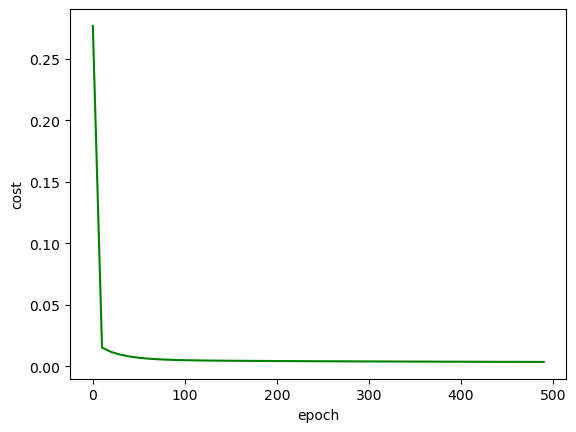

In [26]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list,color='green')

In [27]:
sx.transform([[2600,4]])

C:\Users\soura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.62068966, 0.75      ]])

In [28]:
w

array([0.75550442, 0.41573953])

In [31]:
sy.inverse_transform([[1,0]])  # 1 is maximum price value and 0 is minimum price value

array([[167.,  32.]])

In [32]:
def predict(area,bedrooms,w,b):
    scaled_x = sx.transform([[area,bedrooms]])[0]

    scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
    return sy.inverse_transform([[scaled_price]])

predict(2600,4,w,b)

C:\Users\soura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[121.62794854]])

In [33]:
predict(1000,2,w,b)

C:\Users\soura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[37.29347698]])

In [ ]:
# stochastic gradient descent

In [36]:
import random
random.randint(0,6)

3

In [42]:
def stochastic_gradient_descent(x, y_true, epochs, learning_rate = 0.01):
    number_of_features = x.shape[1]
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = x.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0,total_samples-1)
        sample_x = x[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w,sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
    
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
    
        cost = np.square(sample_y-y_predicted)
    
        if i%100==0:
            cost_list.append(cost)
            epoch_list.append(i)
    
    return w, b, cost, cost_list, epoch_list

In [43]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.70441287, 0.6732927 ]), -0.22860590483457827, 0.022364697657853896)

In [44]:
w,b,cost

(array([0.75550442, 0.41573953]), -0.11682769564715854, 0.0034268126227234427)

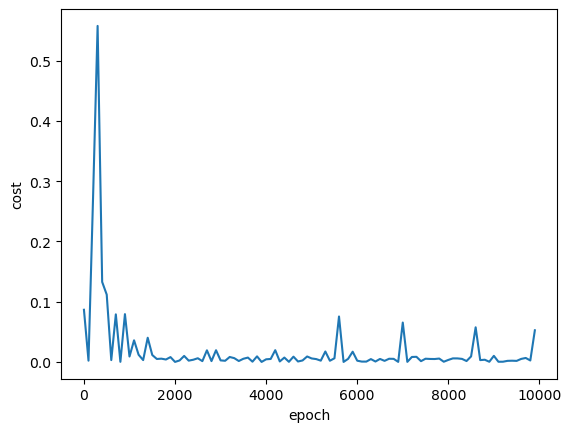

In [47]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list_sgd,cost_list_sgd)

In [45]:
predict(2600,4,w_sgd,b_sgd)

C:\Users\soura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[128.33402935]])

In [48]:
predict(1500,3,w_sgd, b_sgd)

C:\Users\soura\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[69.53960362]])